# **Applying Neural Network as Trading Strategy in Stock Market**

## This is 100% done by Hong Ka Ho

## In the previous paper - **Predict Stock Price Using Tensorflow and scikit-learn** , we have shed light on our 4 approach that we would apply on the stock markets to predict stock price, namely: Neural Network, Regression, Decision Tree, Random Forest. 

## However, prediction of the absolute stock price is not so significant, what's matter is where we can get the trend correctly so that we won't lose money due to going in opposite direction in stock market.

## In this paper, we would still use HSI 20 years data (from 2000 - 2020) and apply the previous neural network model in real back-testing. As a result, we can see how much money this model can bring us in reality!!

## ****WARNING: The project only serves as the purpose of academic study of stock using deep learning and the result may not be rigorous study of the stock price machanism. Any results appear in this paper does not constitute any investment advice ****

# A Quick Implementation of the Previous Model(In a Different Approach)
## For greater details, please refer to my last paper - **Predict Stock Price Using Tensorflow and scikit-learn**

In [184]:
# Import relevant libraries into jupyter notebook first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

In [185]:
#read the hsi csv file
hsi = pd.read_csv('HSI.csv')

In [186]:
# we are going to remove the na values in the hsi
hsi = hsi.dropna()

In [187]:
#let use tomorrow's close price as target we want to predict in the day before
hsi['Future'] = hsi['Close'].shift(-1)
hsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0,17072.820313
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0,15846.719727
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0,15153.230469
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0,15405.629883
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0,15848.150391


In [188]:
#shape of hsi
hsi.shape

(5045, 8)

In [189]:
## From here, we would separate the train and test data set into equally two data sets by time separation!
train = hsi.iloc[:2533, :]
test = hsi.iloc[2533:,:]

In [190]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0,17072.820313
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0,15846.719727
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0,15153.230469
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0,15405.629883
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0,15848.150391


In [191]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future
2606,2010-04-12,22388.769531,22388.769531,22131.929688,22138.169922,22138.169922,1.580087e+09,22103.529297
2607,2010-04-13,22216.109375,22290.669922,22008.050781,22103.529297,22103.529297,1.868203e+09,22121.429688
2608,2010-04-14,22183.050781,22192.330078,22061.769531,22121.429688,22121.429688,1.302086e+09,22157.820313
2609,2010-04-15,22265.359375,22337.890625,22113.210938,22157.820313,22157.820313,1.459715e+09,21865.259766
2610,2010-04-16,22059.300781,22111.990234,21788.880859,21865.259766,21865.259766,2.496724e+09,21405.169922


In [192]:
#lets separate the input and output
x_train = train[['Open', 'High', 'Low', 'Close', 'Volume']]
y_train = train['Future']
x_test = test[['Open', 'High', 'Low', 'Close', 'Volume']]
y_test = test['Future']

In [193]:
#change them into array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [247]:
#reshape the y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)



In [195]:
#check if there are nan in x
np.isnan(x_train).sum(), np.isnan(x_test).sum()

(0, 0)

In [196]:
#check if there are nan in y
np.isnan(y_train).sum(), np.isnan(y_test).sum()

(0, 1)

In [197]:
#get the nan position in y_test
np.argwhere(np.isnan(y_test))

array([[2511,    0]])

In [198]:
#delect the nan values in y 
y_test = np.delete(y_test, 2511, 0)
#delete corresponding rows in x
x_test = np.delete(x_test, (2511), axis = 0)

In [221]:
#double check if there are still nan values in y_test
np.isnan(y_test).sum(), np.isnan(x_test).sum()

(0, 0)

In [222]:
x_test.shape[0] == y_test.shape[0]

True

## Train The Model

In [223]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [224]:
#build network in sequencial fashion
ANN_model = keras.Sequential()
#add dense with 50 neurons and input dimension = 7(features number)
# 500 is the batch size (the number of training examples utilized in one iteration)
ANN_model.add(Dense(500, input_dim = 5))
ANN_model.add(Activation('relu'))

#add another activation with 150 neurons
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
#drop out 50% of the neurons and connected weights
ANN_model.add(Dropout(0.5))

#add additional dense activation
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
#the output should be linear
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               3000      
_________________________________________________________________
activation_20 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 150)               75150     
_________________________________________________________________
activation_21 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_22 (Activation)   (None, 150)              

In [225]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [226]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
#scaling output data
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)

In [227]:
#train the model 100 times everytime
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
102/102 [==============================] - 1s 5ms/step - loss: 0.1283 - val_loss: 0.0826
Epoch 2/100
102/102 [==============================] - 0s 5ms/step - loss: 0.0831 - val_loss: 0.0353
Epoch 3/100
102/102 [==============================] - 0s 5ms/step - loss: 0.0670 - val_loss: 0.1787
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0741 - val_loss: 0.1663
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0797 - val_loss: 0.0281
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0511 - val_loss: 0.0447
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0675 - val_loss: 0.0632
Epoch 8/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.0302
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.0931
Epoch 10/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0524 - val_lo

In [228]:
#Check the accuracy this time
result = ANN_model.evaluate(x_train, y_train)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

80/80 [==============================] - 0s 2ms/step - loss: 0.0135
Accuracy : 0.9864662811160088


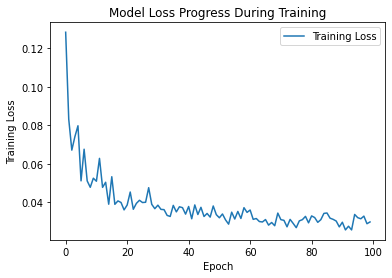

In [229]:
# Look at the progression of the network throughout the epochs
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## Backtest in train data

In [230]:
#apply the trained model to the x_train to get the predicted y
y_predict = ANN_model.predict(x_train)
# transform y_predict back to original scale
y_predict_orig = scaler_y.inverse_transform(y_predict)


In [231]:
y_predict_orig

array([[0.31123722],
       [0.27591845],
       [0.01352073],
       ...,
       [1.3326657 ],
       [1.335419  ],
       [1.3868738 ]], dtype=float32)

In [232]:
#convert y_predict_orig into 1-dim array
y_predict_orig = np.concatenate(y_predict_orig)

In [233]:
#add the y_predict_orig into train
train['Predicted y'] = y_predict_orig

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [234]:
#see if we can sucessfully add to the train df
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future,Predicted y,Predicted y change,y change,Order,Profit,Wealth
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0,17072.820313,0.311237,-194.720703,-296.810546,-1,296.810546,296.810546
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0,15846.719727,0.275918,-1327.856445,-1226.100586,-1,1226.100586,1522.911132
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0,15153.230469,0.013521,-731.574219,-693.489258,-1,693.489258,2216.400390
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0,15405.629883,-0.086079,181.886719,252.399414,1,252.399414,2468.799804
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0,15848.150391,-0.041504,509.770508,442.520508,1,442.520508,2911.320312


In [235]:
#create another column to denote the change in predicted y
train['Predicted y change'] = train['Predicted y'].shift(-1) - train['Predicted y']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [236]:
#Create another column to record the change in real y
train['y change'] = train['Future'] - train['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future,Predicted y,Predicted y change,y change,Order,Profit,Wealth
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0,17072.820313,0.311237,-0.035319,-296.810546,-1,296.810546,296.810546
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0,15846.719727,0.275918,-0.262398,-1226.100586,-1,1226.100586,1522.911132
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0,15153.230469,0.013521,-0.099600,-693.489258,-1,693.489258,2216.400390
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0,15405.629883,-0.086079,0.044575,252.399414,1,252.399414,2468.799804
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0,15848.150391,-0.041504,0.078800,442.520508,1,442.520508,2911.320312


### Here we would create the trading signal : 

### When the predicted y change is negative we would go short and assign -1 to the order signal. Conversely, we would assign 1 meaning that we would go long if the predicted y change is positive

In [238]:
#Create the order signal
train['Order'] = [1 if sig>0 else -1 for sig in train['Predicted y change']]
#record the profit according to our signal
train['Profit'] = train['y change'] * train['Order']
#record our wealth throughout the investment period
train['Wealth'] = train['Profit'].cumsum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

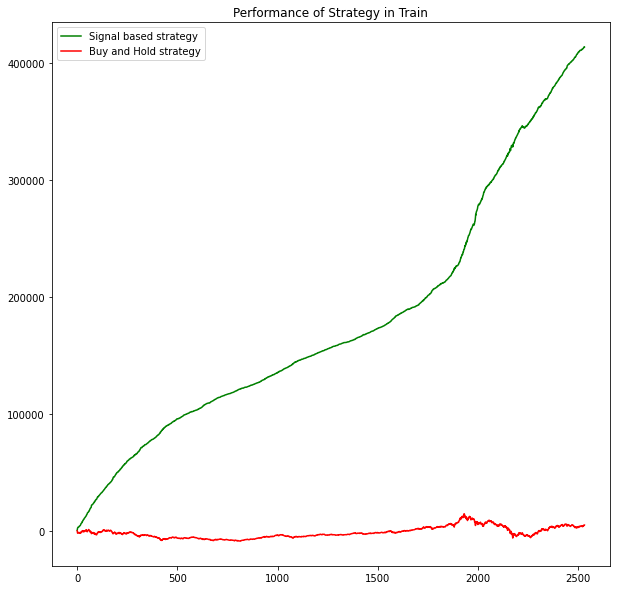

In [239]:
#Let's take a look at the difference between using the neural network model and simply holding the HSI ETF
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(train['y change'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [240]:
# Now compare the total profit in numbers
train['y change'].sum(), train['Profit'].sum()

(4768.539063, 414193.72463299986)

### We can see that applying the neural network in the train data set would bring 100 times larger profit than simply putting the money into HSI ETF and hold it till 2010

## Backtest in Test Data

In [252]:
test = test.dropna()

In [253]:
#apply the trained model to the x_test to get the predicted y
y_test_predict = ANN_model.predict(x_test)
# transform y_predict back to original scale
y_test_predict_orig = scaler_y.inverse_transform(y_test_predict)

In [254]:
#convert y_predict_orig into 1-dim array
y_test_predict_orig = np.concatenate(y_test_predict_orig)

In [255]:
#add the y_predict_orig into train
test['Predicted y'] = y_test_predict_orig

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [256]:
#see if we can sucessfully add to the train df
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future,Predicted y
2606,2010-04-12,22388.769531,22388.769531,22131.929688,22138.169922,22138.169922,1.580087e+09,22103.529297,288474.56250
2607,2010-04-13,22216.109375,22290.669922,22008.050781,22103.529297,22103.529297,1.868203e+09,22121.429688,340694.56250
2608,2010-04-14,22183.050781,22192.330078,22061.769531,22121.429688,22121.429688,1.302086e+09,22157.820313,238070.50000
2609,2010-04-15,22265.359375,22337.890625,22113.210938,22157.820313,22157.820313,1.459715e+09,21865.259766,266650.34375
2610,2010-04-16,22059.300781,22111.990234,21788.880859,21865.259766,21865.259766,2.496724e+09,21405.169922,454608.62500


In [257]:
#create another column to denote the change in predicted y
test['Predicted y change'] = test['Predicted y'].shift(-1) - test['Predicted y']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [258]:
#Create another column to record the change in real y
test['y change'] = test['Future'] - test['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [259]:
#Create the order signal
test['Order'] = [1 if sig>0 else -1 for sig in test['Predicted y change']]
#record the profit according to our signal
test['Profit'] = test['y change'] * test['Order']
#record our wealth throughout the investment period
test['Wealth'] = test['Profit'].cumsum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

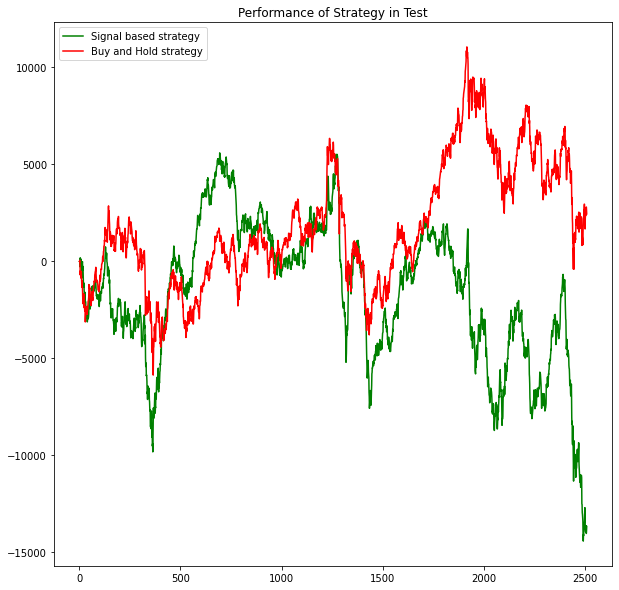

In [260]:
#Let's take a look at the difference between using the neural network model and simply holding the HSI ETF
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(test['y change'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [261]:
# Now compare the total profit in numbers
test['y change'].sum(), test['Profit'].sum()

(2411.820312, -13689.84374400007)

### We can see that the neural network model will make us lose money in the test data, this reveals that the neural network performs poorly when there are other data it haven't seen before. In this case, we would be better off if we just hold the HSI ETF.

### Potential explanation is that the model has trained well with HSI data with close price around 15000. while the test data have price mainly at 20000 level, this have created a bias and error when we train the neural network

# a Final Trail: Use the training method in the previous

## We would pool all the data together and do 85-15 train test split and see what would happen in performance

In [262]:
#input 
x = hsi.drop(columns = ['Future', 'Date', 'Adj Close'])
x.head()

,Open,High,Low,Close,Volume
0,17057.699219,17426.160156,17057.699219,17369.630859,0.0
1,17303.000000,17303.000000,16933.519531,17072.820313,0.0
2,16608.550781,16608.550781,15688.490234,15846.719727,0.0
3,15942.070313,15971.030273,14763.969727,15153.230469,0.0
4,15329.339844,15513.889648,15108.750000,15405.629883,0.0


In [263]:
#Output
y = hsi['Future']
y.head()

0    17072.820313
1    15846.719727
2    15153.230469
3    15405.629883
4    15848.150391
Name: Future, dtype: float64

In [264]:
#change x and y into array
x = np.array(x)
y = np.array(y)

In [265]:
#delect the nan values in y 
y = np.delete(y, 5044, 0)

In [266]:
#delete corresponding rows in x
x = np.delete(x, (5044), axis = 0)

In [268]:
#reshape y into (5045, 1)
y = y.reshape(-1, 1)

In [269]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
#scaling output data
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [271]:
# spliting the data in to test(15%) and train sets(85%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [272]:
#build network in sequencial fashion
ANN_model = keras.Sequential()
#add dense with 50 neurons and input dimension = 7(features number)
# 500 is the batch size (the number of training examples utilized in one iteration)
ANN_model.add(Dense(500, input_dim = 5))
ANN_model.add(Activation('relu'))

#add another activation with 150 neurons
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
#drop out 50% of the neurons and connected weights
ANN_model.add(Dropout(0.5))

#add additional dense activation
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
#the output should be linear
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 500)               3000      
_________________________________________________________________
activation_24 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 150)               75150     
_________________________________________________________________
activation_25 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_26 (Activation)   (None, 150)              

In [273]:
#train the model 100 times everytime
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
172/172 [==============================] - 1s 5ms/step - loss: 0.1122 - val_loss: 0.0246
Epoch 2/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0652 - val_loss: 0.0400
Epoch 3/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0653 - val_loss: 0.0571
Epoch 4/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0528 - val_loss: 0.0160
Epoch 5/100
172/172 [==============================] - 1s 5ms/step - loss: 0.0495 - val_loss: 0.0209
Epoch 6/100
172/172 [==============================] - 1s 5ms/step - loss: 0.0478 - val_loss: 0.0349
Epoch 7/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0486 - val_loss: 0.0269
Epoch 8/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0418 - val_loss: 0.0374
Epoch 9/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0506 - val_loss: 0.0568
Epoch 10/100
172/172 [==============================] - 1s 4ms/step - loss: 0.0437 - val_lo

In [274]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

24/24 [==============================] - 0s 3ms/step - loss: 0.0067
Accuracy : 0.9932511700317264


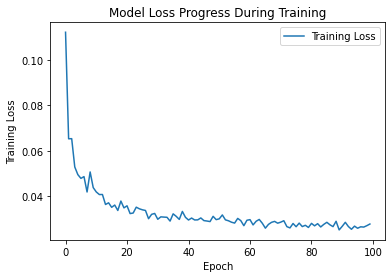

In [275]:
# Look at the progression of the network throughout the epochs
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [277]:
hsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Future
0,2000-01-03,17057.699219,17426.160156,17057.699219,17369.630859,17369.630859,0.0,17072.820313
1,2000-01-04,17303.000000,17303.000000,16933.519531,17072.820313,17072.820313,0.0,15846.719727
2,2000-01-05,16608.550781,16608.550781,15688.490234,15846.719727,15846.719727,0.0,15153.230469
3,2000-01-06,15942.070313,15971.030273,14763.969727,15153.230469,15153.230469,0.0,15405.629883
4,2000-01-07,15329.339844,15513.889648,15108.750000,15405.629883,15405.629883,0.0,15848.150391


In [278]:
#apply the trained model to the x to get the predicted y
y_predict = ANN_model.predict(x)
# transform y_predict back to original scale
y_predict_orig = scaler_y.inverse_transform(y_predict)

In [279]:
#convert y_predict into 1-dim array
y_predict_orig = np.concatenate(y_predict_orig)

In [282]:
#remove nan value in hsi
hsi = hsi.dropna()

In [283]:
#add the y_predict_orig into train
hsi['Predicted y'] = y_predict_orig

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [284]:
#create another column to denote the change in predicted y
hsi['Predicted y change'] = hsi['Predicted y'].shift(-1) - hsi['Predicted y']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [285]:
#Create another column to record the change in real y
hsi['y change'] = hsi['Future'] - hsi['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
#Create the order signal
hsi['Order'] = [1 if sig>0 else -1 for sig in hsi['Predicted y change']]
#record the profit according to our signal
hsi['Profit'] = hsi['y change'] * hsi['Order']
#record our wealth throughout the investment period
hsi['Wealth'] = hsi['Profit'].cumsum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

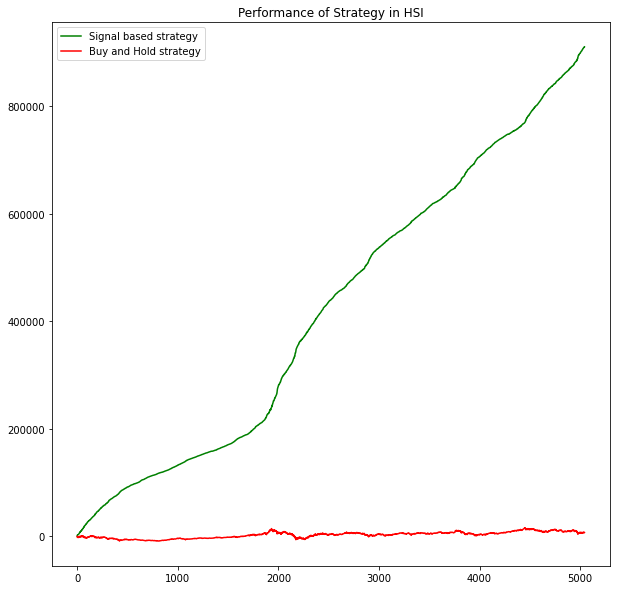

In [289]:
#Let's take a look at the difference between using the neural network model and simply holding the HSI ETF
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in HSI')
plt.plot(hsi['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(hsi['y change'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [290]:
# Now compare the total profit in numbers
hsi['y change'].sum(), hsi['Profit'].sum()

(7180.359375, 910676.7148629999)

### We observe if we put all mixed 85% of data into train , we would get a model which brings us 126 times more profit than that of simply holding the ETF of HSI

### This modification is great since it allows the model to have a training of the price movement in 10000 index level and 20000 index level respectively in HSI. Therefore, I believe this model will be a successful trading model if we try to apply it in recent analysis which gives us some signals in the future about the trend since it has trained with the most recent movement of HSI 

# Statistical Analysis of our Strategy for the Three Scenarios

In [293]:
train['Wealth'] = train['Wealth'] + train.loc[Train.index[0], 'Close']
test['Wealth'] = test['Wealth'] + test.loc[test.index[0], 'Close']
hsi['Wealth'] = hsi['Wealth'] + hsi.loc[hsi.index[0], 'Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [297]:
# Sharpe Ratio on Train data
train['Return'] = np.log(train['Wealth']) - np.log(train['Wealth'].shift(1))
dailyr = train['Return'].dropna()
a_1 = dailyr.mean()/dailyr.std(ddof=1)
a_2 = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)

print('Daily Sharpe Ratio is ', a_1)
print('Yearly Sharpe Ratio is ', a_2)

Daily Sharpe Ratio is  0.4370025922183488
Yearly Sharpe Ratio is  6.937201087801926


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [298]:
# Sharpe Ratio on Test data
test['Return'] = np.log(test['Wealth']) - np.log(test['Wealth'].shift(1))
dailyr =test['Return'].dropna()
b_1 = dailyr.mean()/dailyr.std(ddof=1)
b_2 = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)

print('Daily Sharpe Ratio is ', b_1)
print('Yearly Sharpe Ratio is ', b_2)

Daily Sharpe Ratio is  -0.024454811506806153
Yearly Sharpe Ratio is  -0.3882080976358189


In [299]:
# Sharpe Ratio on whole HSI data
hsi['Return'] = np.log(hsi['Wealth']) - np.log(hsi['Wealth'].shift(1))
dailyr =hsi['Return'].dropna()
c_1 = dailyr.mean()/dailyr.std(ddof=1)
c_2 = (252**0.5)*dailyr.mean()/dailyr.std(ddof=1)

print('Daily Sharpe Ratio is ', c_1)
print('Yearly Sharpe Ratio is ', c_2)

Daily Sharpe Ratio is  0.35938688939983854
Yearly Sharpe Ratio is  5.705090002854288


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [319]:
# Maximum Drawdown in Train data
train['Peak'] = train['Wealth'].cummax()
train['Drawdown'] = (train['Peak'] - train['Wealth'])/train['Peak']
a_3 = train['Drawdown'].max()
print('Maximum Drawdown in Train is ', a_3)

Maximum Drawdown in Train is  0.005460241437271304


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [320]:
# Maximum Drawdown in Test data
test['Peak'] = test['Wealth'].cummax()
test['Drawdown'] = (test['Peak'] - test['Wealth'])/test['Peak']
b_3 = test['Drawdown'].max()
print('Maximum Drawdown in Test is ',b_3)

Maximum Drawdown in Test is  0.7220612052668596


In [321]:
# Maximum Drawdown in HSI data
hsi['Peak'] = hsi['Wealth'].cummax()
hsi['Drawdown'] = (hsi['Peak'] - hsi['Wealth'])/hsi['Peak']
c_3 = hsi['Drawdown'].max()
print('Maximum Drawdown in HSI is ',c_3)

Maximum Drawdown in HSI is  0.012886705366248521


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [317]:
#Find out how many times the return of our strategy outweight the HSI return
#Train data
a_4 = train['Profit'].sum() / train['y change'].sum()
#Test Data
b_4 = test['Profit'].sum() / test['y change'].sum()
#HSI
c_4 = hsi['Profit'].sum() / test['y change'].sum()


# **Summary of the result**

In [322]:
# Let's make a summary table
Summary = pd.DataFrame()
Summary['Analysis'] = ['Daily Sharpe Ratio', 'Yearly Sharpe Ratio', 'Max. Drawdown', 'Excess Return to HSI(in terms of times)']
Summary['Train'] = [a_1, a_2, a_3, a_4]
Summary['Test'] = [b_1, b_2, b_3, b_4]
Summary['HSI'] = [c_1, c_2, c_3, c_4]
Summary

,Analysis,Train,Test,HSI
0,Daily Sharpe Ratio,0.437003,-0.024455,0.359387
1,Yearly Sharpe Ratio,6.937201,-0.388208,5.705090
2,Max. Drawdown,0.005460,0.722061,0.012887
3,Excess Return to HSI(in terms of times),86.859669,-5.676146,377.588956


### In conclusion, the neural network model used in our case is lucrative in the training data set. However, when time evolves, maybe there are some price movement patterns change or the changes in business enviornment in Hong Kong, our training model(approach 1) using 2000 - 2010 fail to provide us with reliable signal and result in negative sharpe ratio and even maximum drawdown of 72% within one trading period.

### Therefore, we need to continuously train our model in order to to adept to the unobservable changes in HSI overtime so that we can still capture the most updating price pattern and it could maintain the robustness of our signal if we really apply it in future.